# Importing the required libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [17]:
df_train = pd.read_csv('train.csv') # reading the training data given in the question
df_train.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [18]:
print((df_train.shape))


(10980, 12)


<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

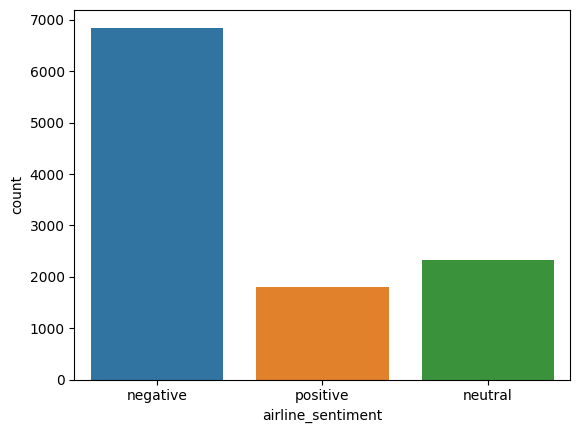

In [19]:
sns.countplot(x='airline_sentiment',data=df_train) # Visualising the sentiments count according to the text

In [20]:
df_train = df_train[['text', 'airline_sentiment']] # Getting the column 'Text'(X train) and 'Airline Sentiment'(Y train)
training_data = df_train.values 
training_data

array([['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
        'negative'],
       ['@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
        'positive'],
       ['@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
        'positive'],
       ...,
       ['@usairways the. Worst. Ever. #dca #customerservice', 'negative'],
       ['@nrhodes85: look! Another apology. DO NOT FLY @USAirways',
        'negative'],
       ['@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.',
        'negative']], dtype=object)

# Spliiting the text into words using NLTK

In [21]:
tweets_train = []
for i in range(len(training_data)):
    tweets_train.append([word_tokenize(training_data[i][0]), training_data[i][1]])  

In [22]:
tweets_train[10]

[['@',
  'SouthwestAir',
  'MCO-',
  '&',
  'gt',
  ';',
  'DCA',
  'flight',
  'almost',
  'full',
  'of',
  'people',
  'screwed',
  'by',
  'the',
  'MSY-DCA',
  'Cancelled',
  'Flightation',
  '.',
  '@',
  'united',
  'and',
  '@',
  'USAirways',
  'did',
  "n't",
  'Cancelled',
  'Flight',
  '.',
  'SWA=mistake',
  '.'],
 'negative']

# Cleaning the Words using WordNetLemmatizer in NLTK

In [23]:
stops = set(stopwords.words('english')) # removing stopwords and the punctuation marks
punctuations = list(string.punctuation)
stops.update(punctuations) 

In [24]:
from nltk.corpus import wordnet # Function for identifying the part of speech
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
lemmatizer = WordNetLemmatizer()
def clean_tweets(words):
    output_words = []
    for w in words:
        if w.isalpha():
            if w.lower() not in stops:
                pos = pos_tag([w])
                clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
                output_words.append(clean_word.lower())
    return output_words

In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
for i in range(len(tweets_train)):
    tweets_train[i] = (clean_tweets(tweets_train[i][0]), tweets_train[i][1]) # calling the function on both the columns ie Text and Airlinr Sentiment

In [28]:
len(tweets_train)

10980

In [29]:
y_train = [] # Sepearting the sentiment and tweet 
tweets = []
for tweet, sentiment in tweets_train:
    tweets.append(" ".join(tweet))
    y_train.append(sentiment)

In [30]:
count_vec = CountVectorizer(max_features=1000) #Using Count Vectorizer to get X-Train
x_train_features = count_vec.fit_transform(tweets)
count_vec.get_feature_names_out()

array(['aa', 'able', 'absolute', 'absolutely', 'accept', 'acceptable',
       'access', 'accommodate', 'account', 'actual', 'actually', 'add',
       'address', 'advantage', 'advise', 'advisory', 'afternoon', 'agent',
       'ago', 'ahead', 'air', 'aircraft', 'airline', 'airlines',
       'airplane', 'airport', 'airway', 'airways', 'alert', 'allow',
       'almost', 'alone', 'already', 'also', 'always', 'amaze', 'america',
       'american', 'americanair', 'americanairlines', 'amp', 'angry',
       'announce', 'announcement', 'another', 'answer', 'anymore',
       'anyone', 'anything', 'anyway', 'anywhere', 'apologize', 'apology',
       'app', 'apparently', 'apply', 'appreciate', 'area', 'around',
       'arrival', 'arrive', 'asap', 'ask', 'assign', 'assist',
       'assistance', 'atl', 'atlanta', 'attempt', 'attendant', 'attitude',
       'austin', 'auto', 'automate', 'available', 'avgeek', 'award',
       'away', 'awesome', 'awful', 'baby', 'back', 'bad',
       'badcustomerservice'

# Check on testing data

In [31]:
df_test = pd.read_csv('test.csv')

In [32]:
testing_data = np.array(df_test['text'])

In [33]:
tweets_test = []
for t in testing_data:
    t = clean_tweets(word_tokenize(t))
    tweets_test.append(" ".join(t))
x_test_features = count_vec.transform(tweets_test)

# Applying the models

Multinomial Naive Bayes Model 

In [34]:
mnv = MultinomialNB(alpha = 1)
mnv.fit(x_train_features, y_train)

y_pred_mnv = mnv.predict(x_test_features)

df = pd.DataFrame(y_pred_mnv)
df.to_csv('pred_mnv.csv', index = False, header = False)

Decision Tree Model

In [35]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train_features, y_train)

y_pred_dt = dt.predict(x_test_features)

df = pd.DataFrame(y_pred_dt)
df.to_csv('pred_dt.csv', index = False, header = False)

Random Forest Classifier Model

In [36]:
rf = RandomForestClassifier()
rf.fit(x_train_features, y_train)

y_pred_rf = rf.predict(x_test_features)
df = pd.DataFrame(y_pred_rf)

df.to_csv('predictions_rf.csv', index = False, header = False)